This data cleaning project was sourced from https://www.preppindata.com/challenges. The breakdown of information is as follows.

2023: Week 3 - Targets for DSB
January 18, 2023
 Challenge by: Jenny Martin

For the third week of beginner month, we're going to be building on the skills that we've already learnt, as well as exploring new concepts. This week may feel a little more challenging, but I promise you're ready for it!

**Data Source Bank has some quarterly targets for the value of transactions that are being performed in-person and online. It's our job to compare the transactions to these target figures.**

Inputs
The same transactions file as the first week's 
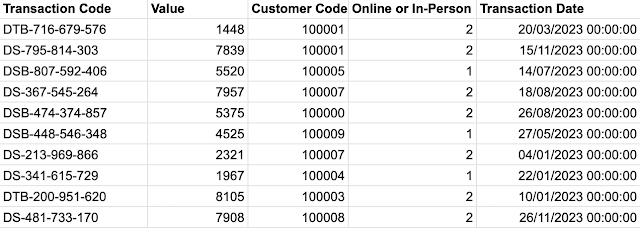
Quarterly Targets dataset 
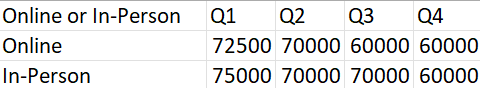

# Input the data
    For the transactions file:
    Filter the transactions to just look at DSB 
    These will be transactions that contain DSB in the Transaction Code field
    Rename the values in the Online or In-person field, Online of the 1 values and In-Person for the 2 values
    Change the date to be the quarter

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\muham\OneDrive\PYTHON AND DATA\Data Science and Analysis\Datasets\PrepinData\New-Year\PD-2023-Wk-1-Input.csv")

In [3]:
dsb = data[data['Transaction Code'].str.contains('DSB')]
dsb['Online or In-Person'].replace({1:'Online',2:'In-Person'}, inplace=True)
dsb['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

In [4]:
dsb.head()

,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date
2,DSB-807-592-406,5520,100005,Online,2023-07-14
4,DSB-474-374-857,5375,100000,In-Person,2023-08-26
5,DSB-448-546-348,4525,100009,Online,2023-05-27
11,DSB-422-218-322,118,100010,Online,2023-05-12
12,DSB-669-227-170,830,100001,Online,2023-04-15


In [5]:
dsb['Transaction Date'] = dsb['Transaction Date'].dt.quarter

In [6]:
dsb.head()

,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date
2,DSB-807-592-406,5520,100005,Online,3
4,DSB-474-374-857,5375,100000,In-Person,3
5,DSB-448-546-348,4525,100009,Online,2
11,DSB-422-218-322,118,100010,Online,2
12,DSB-669-227-170,830,100001,Online,2


#     Sum the transaction values for each quarter and for each Type of Transaction (Online or In-Person)

In [95]:
sum_quater = dsb.groupby(['Online or In-Person','Transaction Date'])['Value'].sum().reset_index()
sum_quater.rename(columns={'Transaction Date':'Quarter'},inplace=True)

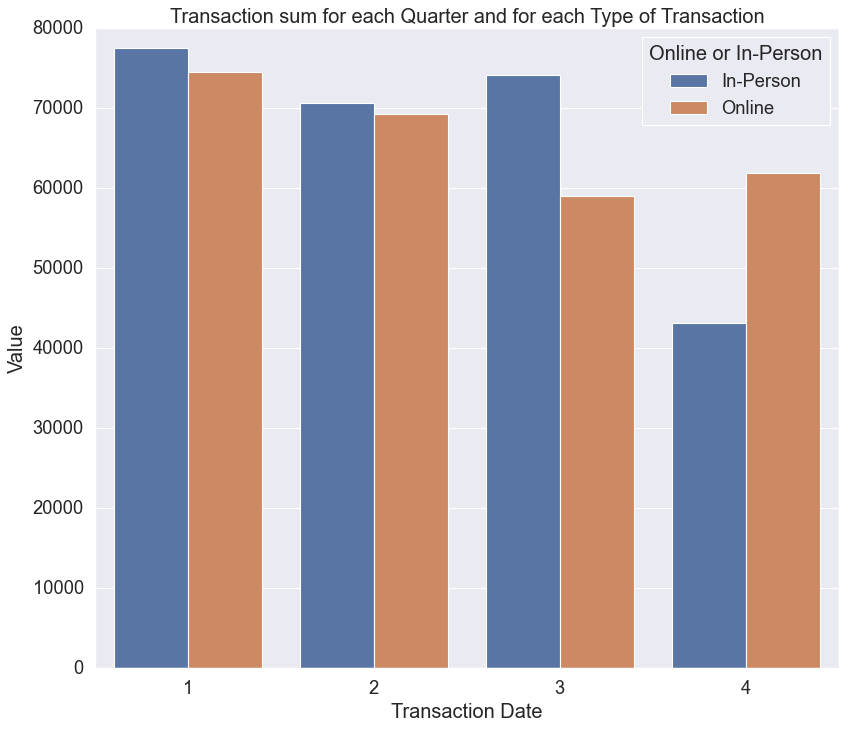

In [24]:
plt.style.use('classic')
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(12,10))
plt.title('Transaction sum for each Quarter and for each Type of Transaction')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.barplot(data = sum_quater, x='Transaction Date', y = 'Value', hue = 'Online or In-Person');

# For the targets file:
    Pivot the quarterly targets so we have a row for each Type of Transaction and each Quarter
    Rename the fields
    Remove the 'Q' from the quarter field and make the data type numeric

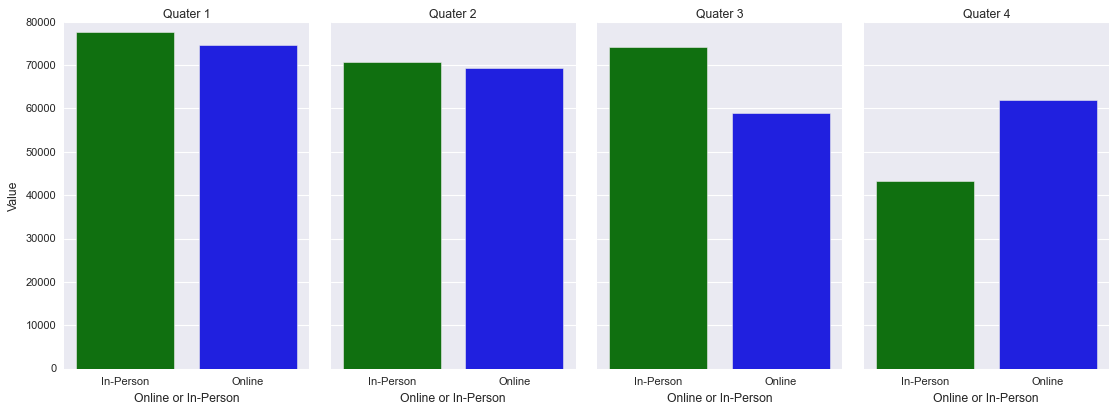

In [57]:
g = sns.FacetGrid(sum_quater, col="Transaction Date", height=5.5, aspect=.65).set_titles(col_template='Quater {col_name}')
plt.style.use('bmh')
g.map_dataframe(sns.barplot, y="Value", x = "Online or In-Person",palette=['green','blue']);
plt.tight_layout()

In [98]:
target = pd.read_csv('Targets.csv')
target.drop(columns=['Unnamed: 3','Unnamed: 4','Unnamed: 5'],inplace=True)
target.rename(columns={"Value": "Target"},inplace=True)

# Join the two datasets together

In [104]:
joined_df = pd.merge(sum_quater,target,  how='outer')
joined_df

,Online or In-Person,Quarter,Value,Target
0,In-Person,1,77576,75000
1,In-Person,2,70634,70000
2,In-Person,3,74189,70000
3,In-Person,4,43223,60000
4,Online,1,74562,72500
5,Online,2,69325,70000
6,Online,3,59072,60000
7,Online,4,61908,60000


# Calculate the Variance to Target for each row

In [105]:
joined_df['Variance'] = joined_df['Value'] - joined_df['Target']
joined_df

,Online or In-Person,Quarter,Value,Target,Variance
0,In-Person,1,77576,75000,2576
1,In-Person,2,70634,70000,634
2,In-Person,3,74189,70000,4189
3,In-Person,4,43223,60000,-16777
4,Online,1,74562,72500,2062
5,Online,2,69325,70000,-675
6,Online,3,59072,60000,-928
7,Online,4,61908,60000,1908
